In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [5]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [7]:
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


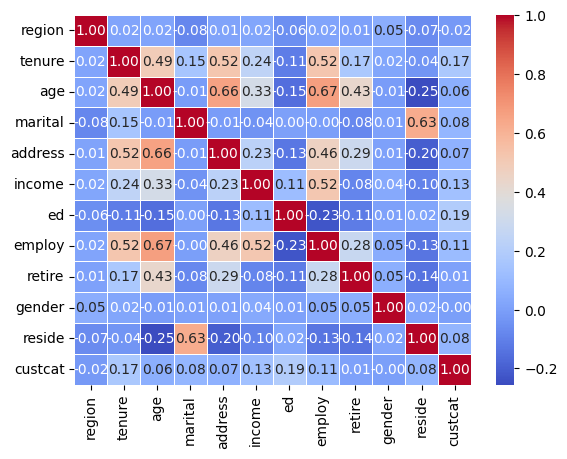

In [9]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,
            annot=True ,
            cmap ='coolwarm',
            fmt='.2f',
            linewidths=0.5
            )
plt.show()

In [10]:
x = df.drop('custcat',
            axis=1)
y = df['custcat']

In [11]:
x_norm = StandardScaler().fit_transform(x)

In [12]:
x_train , x_test , y_train , y_test = train_test_split(x_norm , y , test_size=0.2 , random_state=4)

In [15]:
k= 3

knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(x_train , y_train)

In [16]:
yhat = knn_model.predict(x_test)

In [18]:
print("Test set Accuracy:" , accuracy_score(y_test , yhat) )

Test set Accuracy: 0.315


In [19]:
k=6
knn_classifier2 = KNeighborsClassifier(n_neighbors=k)
knn_model2 = knn_classifier2.fit(x_train , y_train)
yhat2 = knn_model2.predict(x_test)
print("Test set Accuracy:" , accuracy_score(y_test , yhat2) )

Test set Accuracy: 0.31


In [24]:
Ks = 10
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))

for n in range(1,Ks+1):
  knn_model_n = KNeighborsClassifier(n_neighbors=n).fit(x_train , y_train)
  yhat_n = knn_model_n.predict(x_test)
  acc[n-1] = accuracy_score(y_test , yhat_n)
  std_acc[n-1] = np.std(yhat_n == y_test)/np.sqrt(yhat_n.shape[0])

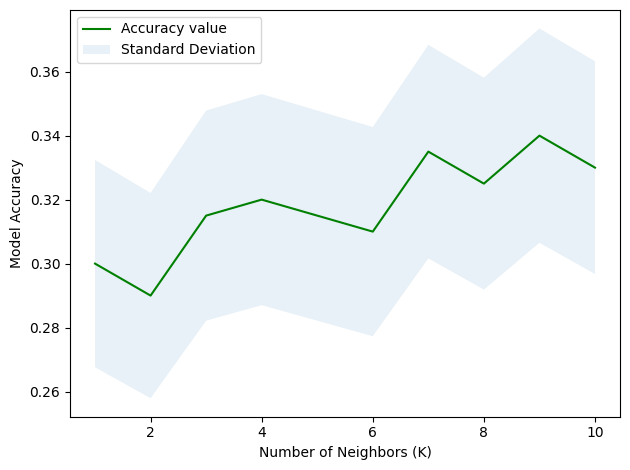

In [25]:
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [26]:
print( "The best accuracy was with", acc.max(), "with k =", acc.argmax()+1)

The best accuracy was with 0.34 with k = 9


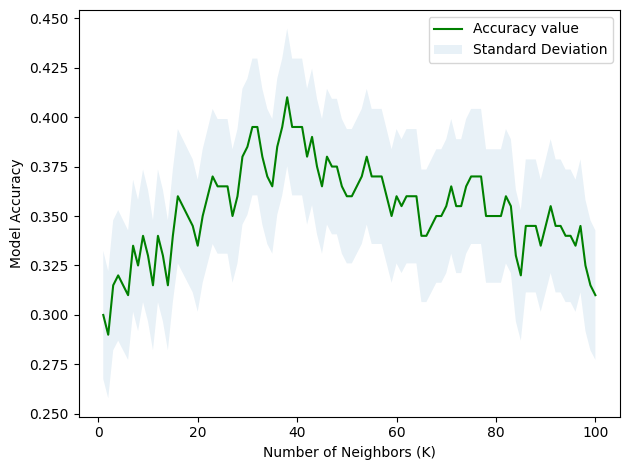

In [30]:
Ks = 100
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))

for n in range(1,Ks+1):
  knn_model_n = KNeighborsClassifier(n_neighbors=n).fit(x_train , y_train)
  yhat_n = knn_model_n.predict(x_test)
  acc[n-1] = accuracy_score(y_test , yhat_n)
  std_acc[n-1] = np.std(yhat_n == y_test)/np.sqrt(yhat_n.shape[0])
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()